In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, homogeneity_score, consensus_score

In [2]:
data = datasets.load_iris() # vraca objekat koji sadrzi:
# data -> NumPy niz koji sadrzi vrednosti atributa
# target -> NumPy niz koji sadrži klase
# feature_names -> Lista imena atributa

columns = np.array(data.feature_names)
print(columns)
X = data.data 
print(X.shape)
y = data.target
print(y.shape)

data_values = np.concatenate((X, y.reshape((y.shape[0], 1))), axis=1)
iris_df = pd.DataFrame(data=data_values, columns=[col for col in columns] + ['class'])

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
(150, 4)
(150,)


In [3]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

CLIQUE

https://www.youtube.com/watch?v=6kHs3yJl19o

In [13]:
# https://pyclustering.github.io/docs/0.9.0/html/d2/d4f/classpyclustering_1_1cluster_1_1clique_1_1clique.html
#!pip install pyclustering
from pyclustering.cluster.clique import clique, clique_visualizer

cl = clique(X, amount_intervals=5, density_threshold=3)
cl.process()

cl_clusters = cl.get_clusters()
     
print("Broj pronađenih klastera:", len(cl_clusters))
     


Broj pronađenih klastera: 2


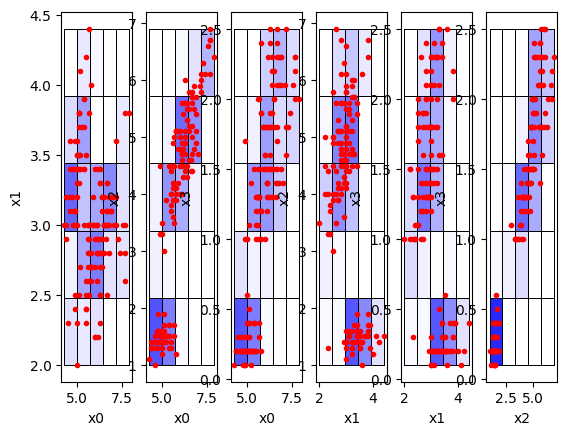

In [14]:
cells = cl.get_cells()
clique_visualizer.show_grid(cells, X)

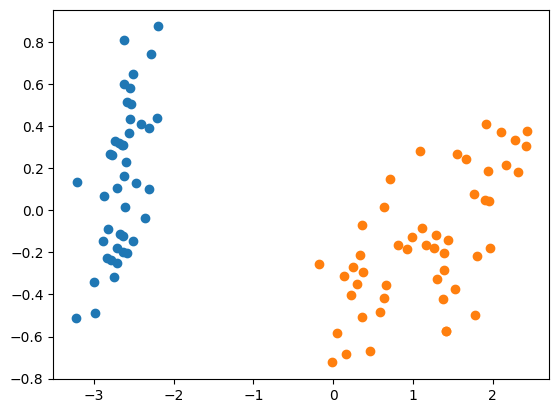

In [15]:
# Napomena: Nedostajuće tačke predstavljanju elemenate van granica
for i in range(len(cl_clusters)):
    cluster = cl_clusters[i]
    _ = plt.scatter(X_pca[cluster, 0], X_pca[cluster, 1])

SOM (Self Organized Map) - poseban tip klasterovanja koji je istovremeno algoritam za klasterovanje i za vizualizaciju podataka

https://www.youtube.com/watch?v=c1coFkBBhhU

https://www.youtube.com/watch?v=XF1V8Af1i7c

https://www.youtube.com/watch?v=_xUMTkrzofA

In [18]:
# https://pypi.org/project/sklearn-som/
#!pip install sklearn-som
from sklearn_som.som import SOM
     
iris_som = SOM(m=3, n=1, dim=X.shape[1])
_ = iris_som.fit(X)

In [20]:
som_clusters = iris_som.predict(X)

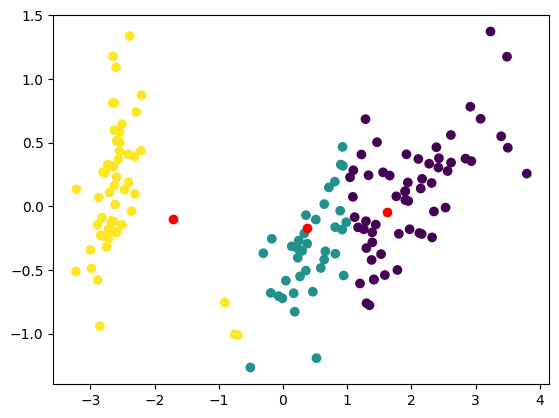

In [21]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=som_clusters)
C_pca = pca.transform(iris_som.weights)
plt.scatter(C_pca[:, 0], C_pca[:, 1], c='red')

Spektralno klasterovanje - model interno konstruiše graf, moguće je izračunati odvojeno graf najbližih suseda

In [4]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3)
_ = sc.fit(X)

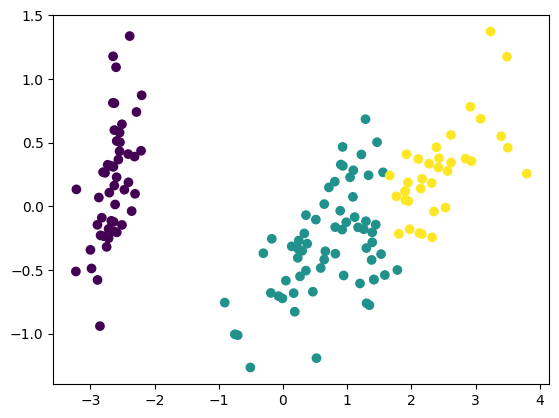

In [5]:
_ = plt.scatter(X_pca[:,0], X_pca[:,1], c=sc.labels_)

In [6]:
silhouette_score(X, sc.labels_, metric='euclidean')

0.5553062646081594

In [7]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=sc.labels_)

0.7869234996582516

Spektralno Bi-Klasterovanje - istovremeno klasterovanje entiteta i atributa pomoću reorganizacije matrice podataka pod pretpostavkom postojanja strukture "šahovske table" u matrici podataka.

In [9]:
from sklearn.cluster import SpectralBiclustering
sbc = SpectralBiclustering(n_clusters=3, n_components=2, n_best=2)
_ = sbc.fit(X)

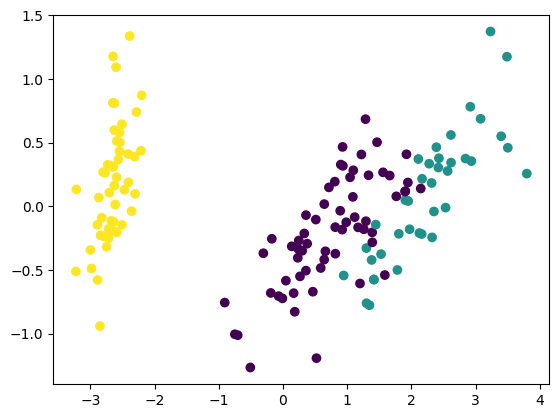

In [10]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sbc.row_labels_)

In [11]:
silhouette_score(X, sbc.row_labels_, metric='euclidean')

0.4658629662525297

In [12]:
homogeneity_score(labels_true=y, labels_pred=sbc.row_labels_)

0.7281425116063388

GMM(Gaussian Mixture Models)

In [15]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

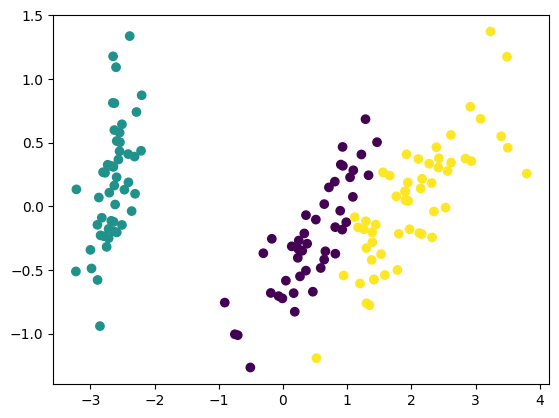

In [16]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

In [17]:
silhouette_score(X, labels, metric='euclidean')

0.5011761635067206

In [18]:
homogeneity_score(labels_true=y, labels_pred=labels)

0.8983263672602775